In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('matches.csv')

In [3]:
data.columns

Index(['id', 'season', 'city', 'date', 'match_type', 'player_of_match',
       'venue', 'team1', 'team2', 'toss_winner', 'toss_decision', 'winner',
       'result', 'result_margin', 'target_runs', 'target_overs', 'super_over',
       'method', 'umpire1', 'umpire2'],
      dtype='object')

In [4]:
data.isnull().sum()

id                    0
season                0
city                 51
date                  0
match_type            0
player_of_match       5
venue                 0
team1                 0
team2                 0
toss_winner           0
toss_decision         0
winner                5
result                0
result_margin        19
target_runs           3
target_overs          3
super_over            0
method             1074
umpire1               0
umpire2               0
dtype: int64

In [5]:
data.drop(columns=['method','umpire1','umpire2','super_over'],inplace=True)

In [6]:
data.dropna(inplace=True)

In [7]:
delivery=pd.read_csv('deliveries.csv')

In [8]:
delivery.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batter                   0
bowler                   0
non_striker              0
batsman_runs             0
extra_runs               0
total_runs               0
extras_type         246795
is_wicket                0
player_dismissed    247970
dismissal_kind      247970
fielder             251566
dtype: int64

In [9]:
# Select only relevant columns
useful_cols = ['match_id', 'inning', 'batting_team', 'bowling_team', 
               'over', 'ball', 'batsman_runs', 'extra_runs', 
               'total_runs', 'is_wicket']

df_filtered = delivery[useful_cols]

df_filtered.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman_runs,extra_runs,total_runs,is_wicket
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,0,1,1,0
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,0,0,0,0
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,0,1,1,0
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,0,0,0,0
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,0,0,0,0


In [10]:
data.columns

Index(['id', 'season', 'city', 'date', 'match_type', 'player_of_match',
       'venue', 'team1', 'team2', 'toss_winner', 'toss_decision', 'winner',
       'result', 'result_margin', 'target_runs', 'target_overs'],
      dtype='object')

In [11]:
df_filtered.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman_runs', 'extra_runs', 'total_runs', 'is_wicket'],
      dtype='object')

In [12]:
# Merge datasets on match_id
df = df_filtered.merge(data, left_on='match_id', right_on='id')

# Filter only 1st innings
df = df[df['inning'].isin([1,2])]

# Compute useful features
df['runs_left'] = df['target_runs'] - df.groupby('match_id')['total_runs'].cumsum()
df['balls_left'] = 120 - (df['over'] * 6 + df['ball'])
df['wickets_in_hand'] = 10 - df.groupby('match_id')['is_wicket'].cumsum()
df['CRR'] = df.groupby('match_id')['total_runs'].cumsum() / df['over']
df['RRR'] = (6 * df["runs_left"]) / df["balls_left"]
df['season'] = df['season'].astype(str).str[:4].astype(int)

# Keep only final row per match (end of 1st innings)
df_final = df.groupby('match_id').last().reset_index()

In [13]:
df_final

,match_id,inning,batting_team,bowling_team,over,ball,batsman_runs,extra_runs,total_runs,is_wicket,...,winner,result,result_margin,target_runs,target_overs,runs_left,balls_left,wickets_in_hand,CRR,RRR
0,335982,2,Royal Challengers Bangalore,Kolkata Knight Riders,15,2,0,0,0,1,...,Kolkata Knight Riders,runs,140.0,223.0,20.0,-81.0,28,-3,20.266667,-17.357143
1,335983,2,Kings XI Punjab,Chennai Super Kings,19,6,0,0,0,0,...,Chennai Super Kings,runs,33.0,241.0,20.0,-206.0,0,1,23.526316,-inf
2,335984,2,Delhi Daredevils,Rajasthan Royals,15,1,4,0,4,0,...,Delhi Daredevils,wickets,9.0,130.0,20.0,-131.0,29,1,17.400000,-27.103448
3,335985,2,Royal Challengers Bangalore,Mumbai Indians,19,5,1,0,1,0,...,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,-165.0,1,-2,17.421053,-990.000000
4,335986,2,Kolkata Knight Riders,Deccan Chargers,18,6,6,0,6,0,...,Kolkata Knight Riders,wickets,5.0,111.0,20.0,-111.0,6,-5,12.333333,-111.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1023,1426307,2,Sunrisers Hyderabad,Punjab Kings,19,1,4,0,4,0,...,Sunrisers Hyderabad,wickets,4.0,215.0,20.0,-214.0,5,-1,22.578947,-256.800000
1024,1426309,2,Kolkata Knight Riders,Sunrisers Hyderabad,13,4,6,0,6,0,...,Kolkata Knight Riders,wickets,8.0,160.0,20.0,-163.0,38,-2,24.846154,-25.736842
1025,1426310,2,Rajasthan Royals,Royal Challengers Bengaluru,18,6,6,0,6,0,...,Rajasthan Royals,wickets,4.0,173.0,20.0,-173.0,6,-4,19.222222,-173.000000
1026,1426311,2,Rajasthan Royals,Sunrisers Hyderabad,19,6,1,0,1,0,...,Sunrisers Hyderabad,runs,36.0,176.0,20.0,-138.0,0,-6,16.526316,-inf


In [14]:
# Select relevant features
df_final = df_final[['match_id','batting_team', 'bowling_team', 'city', 'runs_left', 'balls_left',
                     'wickets_in_hand', 'target_runs', 'CRR', 'RRR']]

# Store the actual final score of the 1st innings as the target variable
df_final['result'] = df.groupby('match_id')['total_runs'].sum().values

In [15]:
import numpy as np

# Replace infinity with NaN
df_final.replace([np.inf, -np.inf], np.nan, inplace=True)

# Fill NaN values with median (or any other strategy)
df_final.fillna(df_final.median(), inplace=True)

In [16]:
df_final

,match_id,batting_team,bowling_team,city,runs_left,balls_left,wickets_in_hand,target_runs,CRR,RRR,result
0,335982,Royal Challengers Bangalore,Kolkata Knight Riders,Bangalore,-81.0,28,-3,223.0,20.266667,-17.357143,304
1,335983,Kings XI Punjab,Chennai Super Kings,Chandigarh,-206.0,0,1,241.0,23.526316,-85.000000,447
2,335984,Delhi Daredevils,Rajasthan Royals,Delhi,-131.0,29,1,130.0,17.400000,-27.103448,261
3,335985,Royal Challengers Bangalore,Mumbai Indians,Mumbai,-165.0,1,-2,166.0,17.421053,-990.000000,331
4,335986,Kolkata Knight Riders,Deccan Chargers,Kolkata,-111.0,6,-5,111.0,12.333333,-111.000000,222
...,...,...,...,...,...,...,...,...,...,...,...
1023,1426307,Sunrisers Hyderabad,Punjab Kings,Hyderabad,-214.0,5,-1,215.0,22.578947,-256.800000,429
1024,1426309,Kolkata Knight Riders,Sunrisers Hyderabad,Ahmedabad,-163.0,38,-2,160.0,24.846154,-25.736842,323
1025,1426310,Rajasthan Royals,Royal Challengers Bengaluru,Ahmedabad,-173.0,6,-4,173.0,19.222222,-173.000000,346
1026,1426311,Rajasthan Royals,Sunrisers Hyderabad,Chennai,-138.0,0,-6,176.0,16.526316,-85.000000,314


In [17]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import joblib

In [18]:
batting=df_final.batting_team.unique().tolist()
bowling=df_final.bowling_team.unique().tolist()
cities=df_final.city.unique().tolist()

In [19]:
label_encoders = {}
for col in ['batting_team', 'bowling_team', 'city']:
    le = LabelEncoder()
    df_final[col] = le.fit_transform(df_final[col])
    label_encoders[col] = le

encoded_batting_teams = label_encoders['batting_team'].fit_transform(batting)
encoded_bowling_teams = label_encoders['bowling_team'].fit_transform(bowling)
encoded_cities = label_encoders['city'].fit_transform(cities)

# Define features and target variable
X = df_final.drop(columns=['result','target_runs'])  # Features
y = df_final['result']  # Target variable (Final score)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
batting_team_mapping = pd.DataFrame({'Team Name': batting, 'Encoded Value': encoded_batting_teams})
bowling_team_mapping = pd.DataFrame({'Team Name': bowling, 'Encoded Value': encoded_bowling_teams})
city_mapping = pd.DataFrame({'City Name': cities, 'Encoded Value': encoded_cities})

In [21]:
batting_team_mapping

,Team Name,Encoded Value
0,Royal Challengers Bangalore,16
1,Kings XI Punjab,6
2,Delhi Daredevils,3
3,Kolkata Knight Riders,8
4,Rajasthan Royals,13
5,Mumbai Indians,10
6,Chennai Super Kings,0
7,Deccan Chargers,1
8,Pune Warriors,11
9,Kochi Tuskers Kerala,7


In [25]:
bowling_team_mapping

,Team Name,Encoded Value
0,Kolkata Knight Riders,8
1,Chennai Super Kings,0
2,Rajasthan Royals,13
3,Mumbai Indians,10
4,Deccan Chargers,1
5,Kings XI Punjab,6
6,Royal Challengers Bangalore,16
7,Delhi Daredevils,3
8,Kochi Tuskers Kerala,7
9,Pune Warriors,11


In [27]:
batting_team_mapping.to_csv("team_mapping.csv", index=False)
city_mapping.to_csv("cities_mapping.csv", index=False)

In [22]:
# Initialize models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"\n{name} Performance:")
    print(f"MSE: {mse:.2f}, R² Score: {r2:.2f}")


Linear Regression Performance:
MSE: 341.99, R² Score: 0.91

Random Forest Performance:
MSE: 252.48, R² Score: 0.93

XGBoost Performance:
MSE: 140.40, R² Score: 0.96


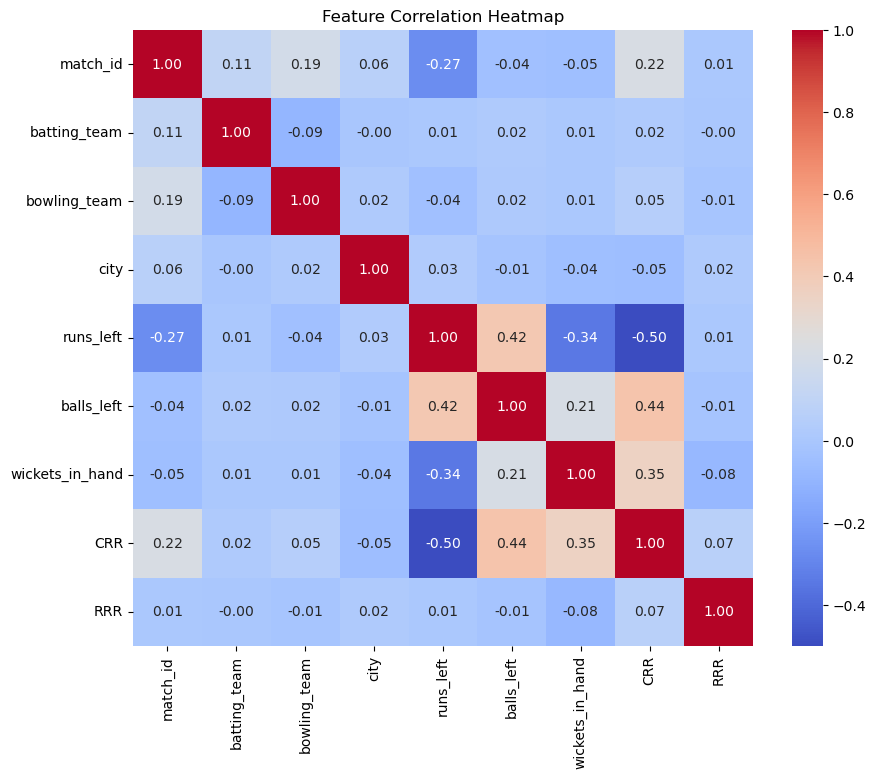

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
corr_matrix = X.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

In [24]:
for name, model in models.items():
    # Save only the XGBoost model
    if name == "XGBoost":
        model.save_model("xgboost_model.json")  # Save as a JSON file
        print("\n✅ XGBoost model saved successfully as 'xgboost_ipl_model.json'")


✅ XGBoost model saved successfully as 'xgboost_ipl_model.json'


In [2]:
import pandas as pd
d=pd.read_csv('deliveries.csv')
d

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,wides,0,NaN,NaN,NaN
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260915,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,5,SS Iyer,AK Markram,VR Iyer,1,0,1,NaN,0,NaN,NaN,NaN
260916,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,6,VR Iyer,AK Markram,SS Iyer,1,0,1,NaN,0,NaN,NaN,NaN
260917,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,1,VR Iyer,Shahbaz Ahmed,SS Iyer,1,0,1,NaN,0,NaN,NaN,NaN
260918,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,2,SS Iyer,Shahbaz Ahmed,VR Iyer,1,0,1,NaN,0,NaN,NaN,NaN


In [3]:
d.over.unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19], dtype=int64)